In [32]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
t=pd.read_csv("reg1.csv")
x=t["Age"].values.reshape(-1,1)
y=t["ShearStrength"].values.reshape(-1,1)
r=LinearRegression().fit(x,y)
print(r.intercept_)
print(r.coef_)


[2627.822359]
[[-37.15359094]]


In [33]:
n=len(x)
ar=np.array([1]*n)
ar=ar.reshape(-1,1)
a=np.concatenate((ar,x),axis=1)
xtra=a.transpose()
xmat=np.matmul(xtra,a)
so=np.linalg.inv(xmat)
b=np.matmul(so,xtra)
bc=np.matmul(b,y)
print(bc)

[[2627.822359  ]
 [ -37.15359094]]


In [35]:
pred=r.predict(x)
res=y-pred
sig=sum(res**2)/(n-2)
print(sig)

[9236.38100372]


In [44]:
import pandas as pd
import statsmodels.api
x=pd.read_csv("reg2.csv")
model=statsmodels.formula.api.ols('Time~Cases+Distance',data=x).fit()
aov=statsmodels.api.stats.anova_lm(model,type=2)
print(aov)

            df       sum_sq      mean_sq           F        PR(>F)
Cases      1.0  5382.408797  5382.408797  506.619363  1.112549e-16
Distance   1.0   168.402126   168.402126   15.850854  6.312469e-04
Residual  22.0   233.731677    10.624167         NaN           NaN


0     21.708084
1     10.353615
2     12.079794
3      9.955646
4     14.194398
5     18.399574
6      7.155376
7     16.673395
8     71.820294
9     19.123587
10    38.092507
11    21.593041
12    12.472991
13    18.682464
14    23.328798
15    29.662928
16    14.913640
17    15.551379
18     7.706807
19    40.887970
20    20.514179
21    56.006528
22    23.357568
23    24.402854
24    10.962584
dtype: float64
[[ 7.15537645e+00  1.45525455e+00]
 [ 7.70680652e+00  1.40469251e+00]
 [ 9.95564609e+00  1.22244282e+00]
 [ 1.03536146e+01  1.19587357e+00]
 [ 1.09625839e+01  1.15824784e+00]
 [ 1.20797937e+01  1.09277458e+00]
 [ 1.24729907e+01  1.06843431e+00]
 [ 1.41943983e+01  9.18741630e-01]
 [ 1.49136397e+01  8.40516304e-01]
 [ 1.55513787e+01  6.78770011e-01]
 [ 1.66733951e+01  6.00446931e-01]
 [ 1.83995743e+01 -3.72396354e-02]
 [ 1.86824641e+01 -1.82283548e-01]
 [ 1.91235871e+01 -4.10107394e-01]
 [ 2.05141789e+01 -1.13837437e+00]
 [ 2.15930409e+01 -1.68714801e+00]
 [ 2.17080843e+01 -1.7200

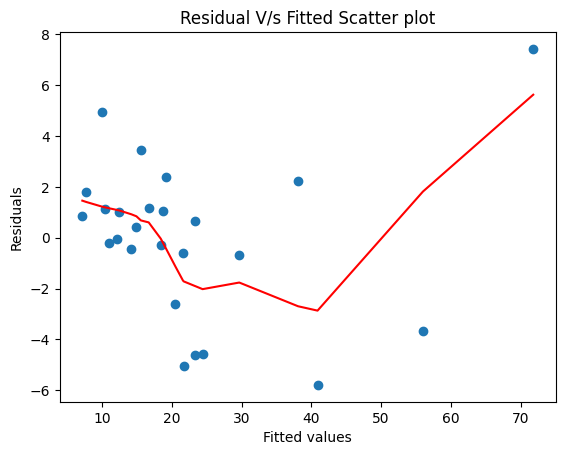

In [52]:
from statsmodels.nonparametric.smoothers_lowess import lowess
import matplotlib.pyplot as plt
res=model.resid
fit=model.fittedvalues
print(fit)
smooth=lowess(res,fit)
print(smooth)

plt.scatter(fit,res)
plt.plot(smooth[:,0],smooth[:,1],color="r")
plt.title("Residual V/s Fitted Scatter plot")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()